In [ ]:
#Course-AIT 526
#Section-DL1
#Team 10
#Teammates:
#Praneeth Ravirala-G01448129
#Shalvi Sanjay Lale-G01419005
#Sagarika Komatireddy-G01467225

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import torch
from transformers import BertForSequenceClassification, BertTokenizer, AdamW
from torch.utils.data import DataLoader, TensorDataset, RandomSampler
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
data1=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Flipkart 25000 rows.xlsx')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24999 non-null  int64 
 1   instruction  24999 non-null  object
 2   input        24999 non-null  object
 3   output       24999 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB


In [ ]:
# group No of sentences by class
gp_class=data1.groupby('output')['input'].count().reset_index()
gp_class.columns=['Tone','Count_Of_Sentences']
print(gp_class.head(10))

       Tone  Count_Of_Sentences
0  negative                3652
1   neutral                1164
2  positive               20183


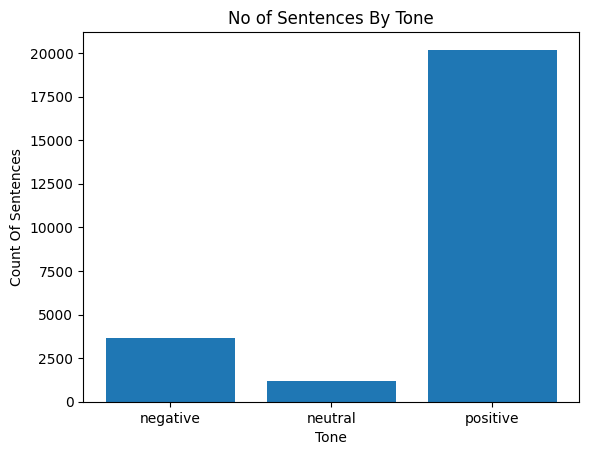

In [ ]:
#Visualise the Grouped data of sentences by class using bar graph
plt.bar(gp_class['Tone'],gp_class['Count_Of_Sentences'])
plt.xlabel('Tone')
plt.ylabel('Count Of Sentences')
plt.title('No of Sentences By Tone')
plt.show()

In [ ]:
#dropping unwanted columns named 'instruction' and 'unnamed'
data1=data1.drop('instruction',axis=1)
data1=data1.drop('Unnamed: 0',axis=1)
data1.head(10)

,input,output
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral
5,the cooler is really fantastic and provides go...,positive
6,very good product,positive
7,very nice,positive
8,very bad cooler,negative
9,very good,positive


In [ ]:
#Tokenising list of sentences into words and removing stop words
data_rem_stopwords=[]
for i in data1['input']:
  word_list=nltk.word_tokenize(str(i))
  temp_list=[]
  for j in word_list:
    if j not in stopwords.words('english'):
      temp_list.append(j)
    t=' '.join(temp_list)
  data_rem_stopwords.append(t)

In [ ]:
#The data without stopwords again converted back to dataframe
df_rem=pd.DataFrame(data_rem_stopwords,columns=['input'])
df_rem['output']=data1['output'].tolist()
df_rem.head(20)

,input,output
0,great cooler excellent air flow price amazing ...,positive
1,best budget 2 fit cooler nice cooling,positive
2,quality good power air decent,positive
3,bad product fan,negative
4,ok ok product,neutral
5,cooler really fantastic provides good air flow...,positive
6,good product,positive
7,nice,positive
8,bad cooler,negative
9,good,positive


In [ ]:
#Using regular expression the punctuations are removed from the sentences
import re
for i in df_rem['input']:
  re.sub(r'[^\w\s]',' ',i)
print(df_rem.head(10))

                                               input    output
0  great cooler excellent air flow price amazing ...  positive
1              best budget 2 fit cooler nice cooling  positive
2                      quality good power air decent  positive
3                                    bad product fan  negative
4                                      ok ok product   neutral
5  cooler really fantastic provides good air flow...  positive
6                                       good product  positive
7                                               nice  positive
8                                         bad cooler  negative
9                                               good  positive


In [ ]:
#Converting sentences to its lower case.
for i in df_rem['input']:
  i=i.lower()
print(df_rem.head(10))

                                               input    output
0  great cooler excellent air flow price amazing ...  positive
1              best budget 2 fit cooler nice cooling  positive
2                      quality good power air decent  positive
3                                    bad product fan  negative
4                                      ok ok product   neutral
5  cooler really fantastic provides good air flow...  positive
6                                       good product  positive
7                                               nice  positive
8                                         bad cooler  negative
9                                               good  positive


In [ ]:
#Preparing list of tokens in whole dataset
from nltk.probability import FreqDist
word_list1=[]
for i in df_rem['input']:
  word_list=nltk.word_tokenize(i)
  word_list1.append(word_list)

[(('good',), 2163), (('nice',), 1103), (('good', 'product'), 1091), (('nice', 'product'), 749), (('super',), 310), (('excellent',), 214), (('good', 'quality'), 198), (('ok',), 186), (('awesome',), 180), (('bad',), 141), (('value', 'money'), 117), (('best',), 111), (('excellent', 'product'), 98), (('good', 'one'), 95), (('superb',), 90), (('awesome', 'product'), 77), (('best', 'product'), 65), (('bad', 'product'), 64), (('nice', 'one'), 63), (('nice', 'products'), 50)]


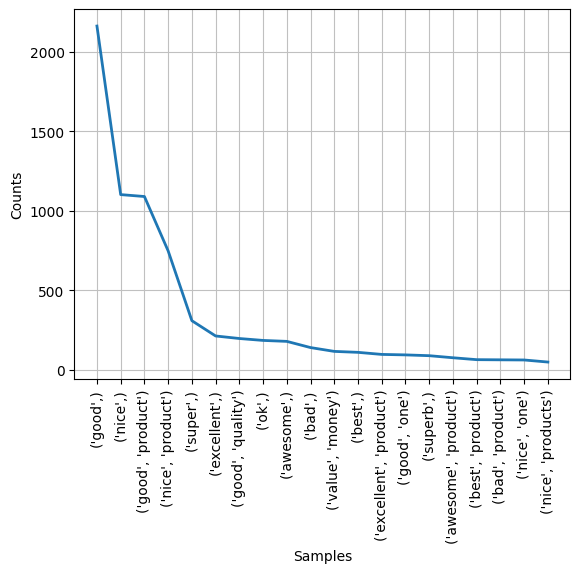

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Retreiving Frequency dictionary of combination of words of a sentence.
tuple_list = [tuple(i) for i in word_list1]
dict1=FreqDist(tuple_list)
print(dict1.most_common(20))
dict1.plot(20)

[(('good',), 1.0), (('nice',), 0.5099398982894129), (('good', 'product'), 0.5043920480813685), (('nice', 'product'), 0.34627831715210355), (('super',), 0.14331946370781323), (('excellent',), 0.09893666204345816), (('good', 'quality'), 0.09153952843273232), (('ok',), 0.08599167822468794), (('awesome',), 0.08321775312066575), (('bad',), 0.0651872399445215), (('value', 'money'), 0.05409153952843273), (('best',), 0.05131761442441054), (('excellent', 'product'), 0.045307443365695796), (('good', 'one'), 0.043920480813684694), (('superb',), 0.04160887656033287), (('awesome', 'product'), 0.03559870550161812), (('best', 'product'), 0.03005085529357374), (('bad', 'product'), 0.029588534442903373), (('nice', 'one'), 0.02912621359223301), (('nice', 'products'), 0.02311604253351826)]


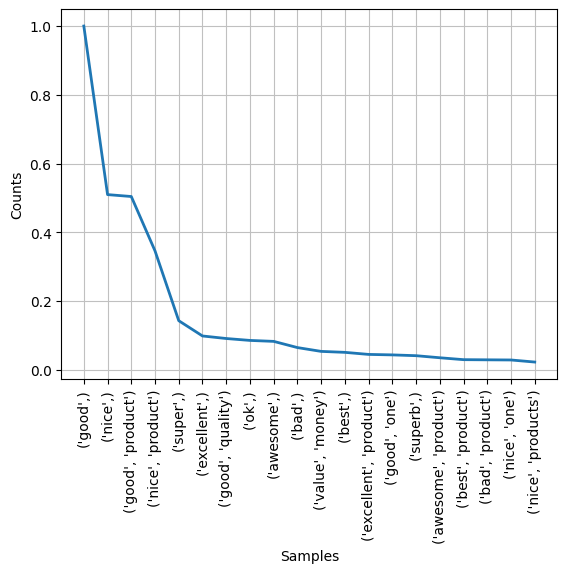

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Retreiving Weighted Frequency dictionary of combination of words of a sentence.
dict1_max=max(dict1.values())
for i in dict1.keys():
  dict1[i]=dict1[i]/dict1_max
print(dict1.most_common(20))
dict1.plot(20)

In [ ]:
#Combining list of sentences to a text for wordcloud
text_stopw_rem=[]
for i in word_list1:
  temp=[]
  for j in i:
    temp.append(j)
  temp=' '.join(temp)
  text_stopw_rem.append(temp)
text_stopw_rem=' '.join(text_stopw_rem)

In [ ]:
text_stopw_rem

'great cooler excellent air flow price amazing unbelievablejust love best budget 2 fit cooler nice cooling quality good power air decent bad product fan ok ok product cooler really fantastic provides good air flow highly recommended good product nice bad cooler good beautiful product good material perfectly working awesome good wonderful product must buy nice air cooler smart cool breeze producer awsm nice product great cooler nice product good nice product good product nice product reasonable price like goodd good product good product kawaleti good cooler amazing beautiful designs affordable price using since 3months great experience good performance nice look product good strong thrust air flow must buy good bad quality nice product soundless product low price company nice best poduct bought flifkart works superb like ac price also reasonable rs 8698 cooler big wide maharaja brand trust every thing good cooler create less noise thing motor powerful even high speed rest things good ye

In [ ]:
#Defining WordCloud function from wordcloud library without stopwords
wordcloud_without_stopwords = WordCloud(stopwords=STOPWORDS).generate(text_stopw_rem)

(-0.5, 399.5, 199.5, -0.5)

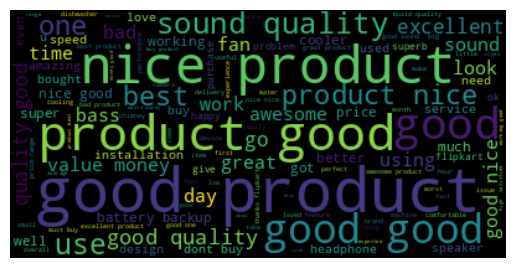

In [ ]:
#Visualising Wordcloud to show the intensity of a word in corpus due to its frequency using matplotlib.
plt.imshow(wordcloud_without_stopwords, interpolation='bilinear')
plt.axis("off")

In [ ]:
#using WordNetLemmatizer defining function for lemmatisation of words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
word_lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#Words are Lemmatised to their corresponding root word
lemmatised_words=[]
for i in word_list1:
  temp=[]
  for j in i:
    temp.append(word_lemmatizer.lemmatize(j))
  temp=' '.join(temp)
  lemmatised_words.append(temp)

[('good', 2164), ('good product', 1126), ('nice', 1104), ('nice product', 799), ('super', 310), ('excellent', 214), ('good quality', 198), ('ok', 186), ('awesome', 180), ('bad', 141), ('value money', 117), ('best', 111), ('excellent product', 99), ('good one', 95), ('superb', 90), ('awesome product', 82), ('bad product', 76), ('best product', 74), ('nice one', 63), ('product good', 42)]


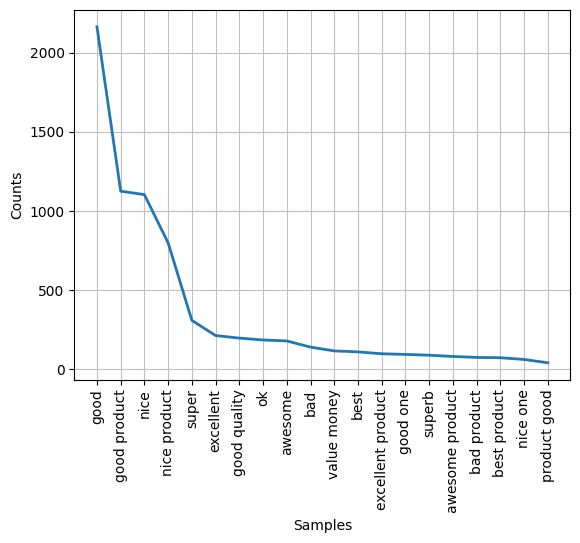

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Retreiving Frequency dictionary of combination of words of a sentence after lemmatisation
tuple_list_lemmatised = tuple(lemmatised_words)
dict1_lemm=FreqDist(tuple_list_lemmatised)
print(dict1_lemm.most_common(20))
dict1_lemm.plot(20)

[('good', 1.0), ('good product', 0.5203327171903882), ('nice', 0.5101663585951941), ('nice product', 0.3692236598890943), ('super', 0.14325323475046212), ('excellent', 0.0988909426987061), ('good quality', 0.09149722735674677), ('ok', 0.08595194085027727), ('awesome', 0.08317929759704251), ('bad', 0.06515711645101664), ('value money', 0.05406654343807763), ('best', 0.05129390018484288), ('excellent product', 0.045748613678373386), ('good one', 0.04390018484288355), ('superb', 0.041589648798521256), ('awesome product', 0.03789279112754159), ('bad product', 0.03512014787430684), ('best product', 0.034195933456561925), ('nice one', 0.02911275415896488), ('product good', 0.019408502772643253)]


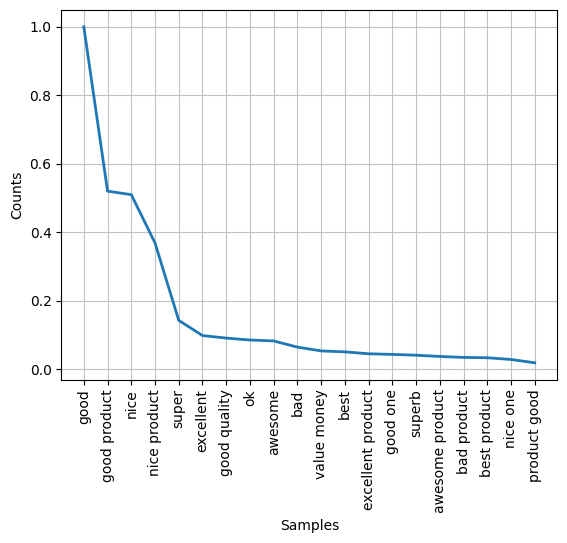

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Retreiving Weighted Frequency dictionary of combination of words of a sentence after lemmatisation
dict1_max_lemm=max(dict1_lemm.values())
for i in dict1_lemm.keys():
  dict1_lemm[i]=dict1_lemm[i]/dict1_max_lemm
print(dict1_lemm.most_common(20))
dict1_lemm.plot(20)

In [ ]:
dict1_lemm_text=' '.join(dict1_lemm)

(-0.5, 399.5, 199.5, -0.5)

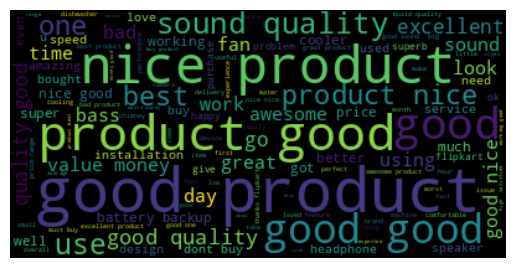

In [ ]:
#Visualising Wordcloud for the lemmatised words to show the intensity of a word in corpus due to its frequency using matplotlib.
wordcloud_lemmatise = WordCloud(stopwords=STOPWORDS).generate(dict1_lemm_text)
plt.imshow(wordcloud_without_stopwords, interpolation='bilinear')
plt.axis("off")

In [ ]:
#Creating Dataframe of the processed data
df_lemmatised=pd.DataFrame(lemmatised_words,columns=['input'])
df_lemmatised['output']=data1['output']

In [ ]:
#Retriving Counter for number of sentences of each tone after processing
from collections import Counter
def most_common_sent(data):
  list_positive=[]
  list_negetive=[]
  list_neutral=[]
  for i in data.index:
    if data.loc[i,'output']=='positive':
      list_positive.append(data.loc[i,'input'])
    elif data.loc[i,'output']=='negative':
      list_negetive.append(data.loc[i,'input'])
    else:
      list_neutral.append(data.loc[i,'input'])
  count_postive=Counter(list_positive)
  count_negetive=Counter(list_negetive)
  count_neutral=Counter(list_neutral)
  return count_postive,count_negetive,count_neutral

In [ ]:
#Retriving Most common Sentences of each tone after processing
count_postive,count_negetive,count_neutral= most_common_sent(df_lemmatised)

In [ ]:
#Retriving Most common Sentences of negative tone after processing
count_negetive.most_common(20)

[('bad', 91),
 ('good', 82),
 ('bad product', 76),
 ('bad quality', 39),
 ('poor quality', 36),
 ('worst product', 30),
 ('waste money', 24),
 ('working', 21),
 ('poor', 17),
 ('worst', 16),
 ('waste product', 16),
 ('quality good', 15),
 ('low quality', 13),
 ('good product', 8),
 ('bed', 8),
 ('worst quality', 8),
 ('good quality', 8),
 ('dont buy', 8),
 ('speed low', 7),
 ('sound quality good', 7)]

In [ ]:
#Retriving Grouped data of Most common Sentences of negative tone after processing
df_count_negetive=pd.DataFrame(count_negetive.most_common(20),columns=['input','count'])
df_count_negetive.head(10)

,input,count
0,bad,91
1,good,82
2,bad product,76
3,bad quality,39
4,poor quality,36
5,worst product,30
6,waste money,24
7,working,21
8,poor,17
9,worst,16


Text(0.5, 1.0, 'Most Common Negetive Tone Sentences')

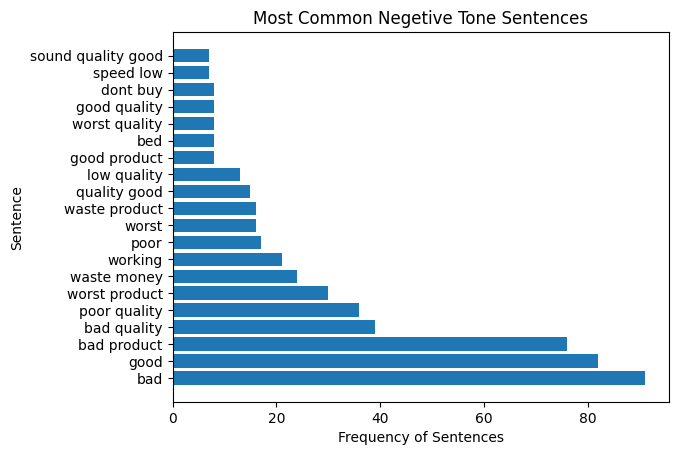

In [ ]:
#Visualising Bar Graph for Grouped data of Most common Sentences of negative tone after processing
plt.barh(df_count_negetive['input'],df_count_negetive['count'])
plt.xlabel('Frequency of Sentences')
plt.ylabel('Sentence')
plt.title('Most Common Negetive Tone Sentences')

In [ ]:
#Retriving Grouped data of Most common Sentences of positive tone after processing
df_count_positive=pd.DataFrame(count_postive.most_common(20),columns=['input','count'])
df_count_positive.head(10)

,input,count
0,good,2077
1,good product,1118
2,nice,1100
3,nice product,799
4,super,309
5,excellent,213
6,good quality,190
7,awesome,177
8,value money,116
9,best,111


Text(0.5, 1.0, 'Most Common Positive Tone Sentences')

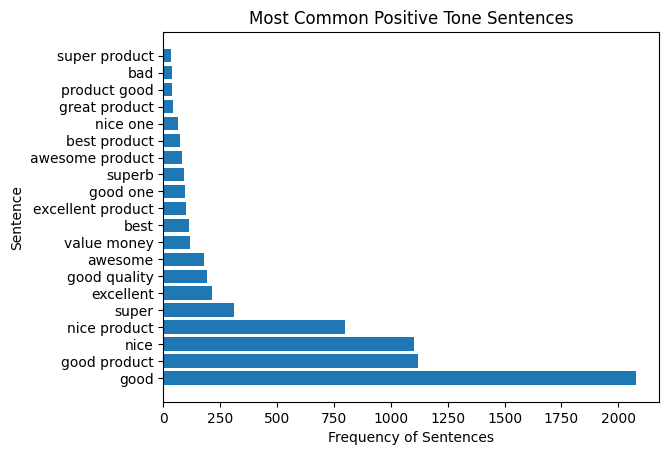

In [ ]:
#Visualising Bar Graph for Grouped data of Most common Sentences of positive tone after processing
plt.barh(df_count_positive['input'],df_count_positive['count'])
plt.xlabel('Frequency of Sentences')
plt.ylabel('Sentence')
plt.title('Most Common Positive Tone Sentences')

In [ ]:
#Retriving Grouped data of Most common Sentences of neutral tone after processing
df_count_neutral=pd.DataFrame(count_neutral.most_common(20),columns=['input','count'])
df_count_neutral.head(10)


,input,count
0,ok,158
1,average,35
2,bad,14
3,okay,14
4,average product,8
5,ok ok,8
6,avarage,6
7,supar,5
8,go,5
9,average quality,5


Text(0.5, 1.0, 'Most Common Neutral Tone Sentences')

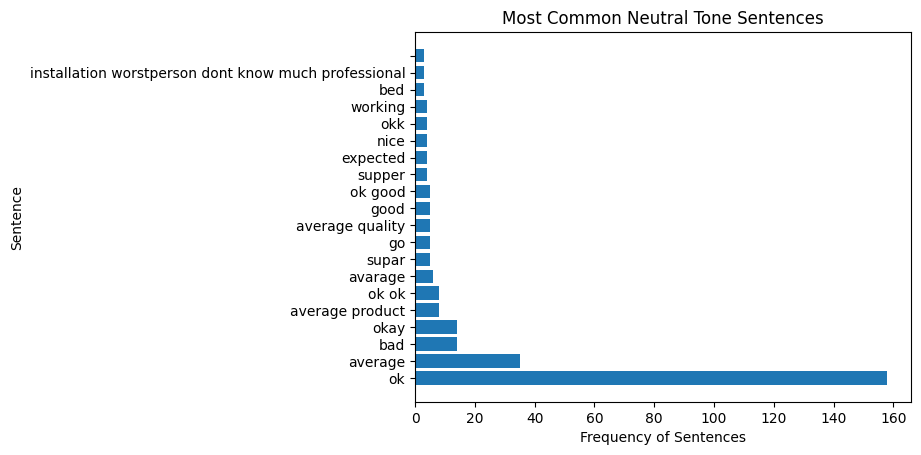

In [ ]:
#Visualising Bar Graph for Grouped data of Most common Sentences of neutral tone after processing
plt.barh(df_count_neutral['input'],df_count_neutral['count'])
plt.xlabel('Frequency of Sentences')
plt.ylabel('Sentence')
plt.title('Most Common Neutral Tone Sentences')

In [ ]:
negative_sent=count_negetive.keys()
list_negative_sent=list(negative_sent)
df_negative_sent=pd.DataFrame(list_negative_sent,columns=['input_negetive'])

In [ ]:
#Retrieving Counter for most number of adjectives in negetive tone sentences
from nltk import pos_tag
list_adj_negetive=[]
for i in df_negative_sent['input_negetive']:
  words_neg=nltk.word_tokenize(i)
  tags=pos_tag(words_neg)
  for i,j in tags:
    if j in ['JJ', 'JJR', 'JJS']:
      list_adj_negetive.append(i)
count_adj_neg=Counter(list_adj_negetive)
print(count_adj_neg)
df_count_adj_neg=pd.DataFrame(count_adj_neg.most_common(10),columns=['input','count'])

Counter({'good': 503, 'bad': 467, 'worst': 249, 'poor': 216, 'dont': 143, 'low': 141, 'much': 66, 'sound': 65, 'disappointed': 56, 'hard': 53, 'flipkart': 51, 'many': 47, 'small': 39, 'high': 37, 'useless': 34, 'big': 33, 'cheap': 33, 'first': 32, 'pathetic': 32, 'due': 31, 'happy': 30, 'slow': 30, 'defective': 29, 'u': 29, 'nice': 27, 'available': 26, 'last': 26, 'ok': 25, 'long': 24, 'broken': 23, 'overall': 22, 'clean': 21, 'little': 21, 'worth': 21, 'plastic': 20, 'open': 20, 'proper': 20, 'unable': 19, 'full': 19, 'fine': 19, 'utensil': 19, 'old': 18, 'great': 18, 'difficult': 17, 'cant': 17, 'ear': 17, 'total': 16, 'technician': 16, 'extra': 16, 'local': 16, 'third': 16, 'electric': 16, 'new': 16, 'horrible': 15, 'best': 15, 'comfortable': 15, 'laptop': 15, 'dead': 15, 'useful': 14, 'heavy': 14, 'noisy': 14, 'able': 14, 'lid': 14, 'satisfied': 13, 'strong': 13, 'give': 13, 'doesnt': 13, 'west': 13, 'suitable': 13, 'light': 13, 'loud': 13, 'second': 13, 'free': 13, 'next': 12, 'we

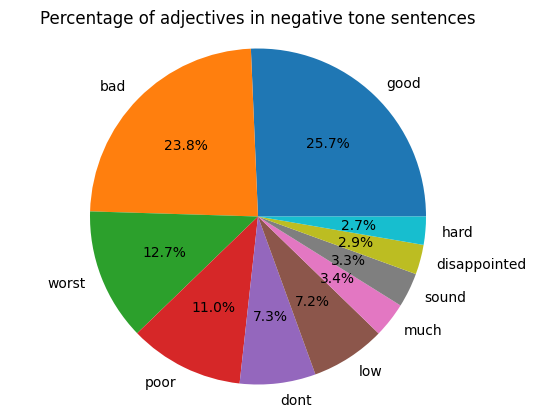

In [ ]:
#Visualising most number of adjectives in negetive tone sentences through pie chart.
df_count_adj_neg_pie=df_count_adj_neg['input'].value_counts()
plt.pie(df_count_adj_neg['count'],labels=df_count_adj_neg['input'],autopct='%1.1f%%')
plt.title('Percentage of adjectives in negative tone sentences')
plt.axis('equal')
plt.show()

In [ ]:
#Retrieving Counter for most number of adjectives in positive tone sentences
positive_sent=count_postive.keys()
list_positive_sent=list(positive_sent)
df_positive_sent=pd.DataFrame(list_positive_sent,columns=['input_positive'])
from nltk import pos_tag
list_adj_positive=[]
for i in df_positive_sent['input_positive']:
  words_positive=nltk.word_tokenize(i)
  tags=pos_tag(words_positive)
  for i,j in tags:
    if j in ['JJ', 'JJR', 'JJS']:
      list_adj_positive.append(i)
count_adj_pos=Counter(list_adj_positive)
print(count_adj_pos)
df_count_adj_pos=pd.DataFrame(count_adj_pos.most_common(10),columns=['input','count'])

Counter({'good': 5402, 'nice': 1643, 'best': 1236, 'great': 734, 'awesome': 652, 'excellent': 525, 'happy': 468, 'sound': 421, 'super': 300, 'easy': 278, 'overall': 276, 'u': 270, 'much': 266, 'useful': 230, 'low': 222, 'high': 216, 'little': 214, 'worth': 207, 'small': 184, 'big': 173, 'comfortable': 164, 'clean': 162, 'perfect': 162, 'last': 154, 'fine': 153, 'clear': 151, 'full': 148, 'amazing': 148, 'utensil': 144, 'satisfied': 125, 'flipkart': 125, 'better': 119, 'available': 116, 'fantastic': 114, 'hard': 114, 'ok': 103, 'light': 100, 'first': 99, 'many': 94, 'long': 94, 'normal': 93, 'wonderful': 92, 'new': 92, 'ear': 91, 'decent': 90, 'extra': 89, 'bad': 87, 'fast': 85, 'smart': 84, 'heavy': 84, 'indian': 81, 'quick': 78, 'free': 77, 'cool': 75, 'give': 74, 'second': 73, 'le': 72, 'dont': 70, 'build': 70, 'usb': 68, 'powerful': 66, 'beautiful': 65, 'strong': 64, 'due': 61, 'thank': 61, 'superb': 60, 'top': 58, 'n': 55, 'daily': 54, 'helpful': 54, 'reasonable': 53, 'affordable':

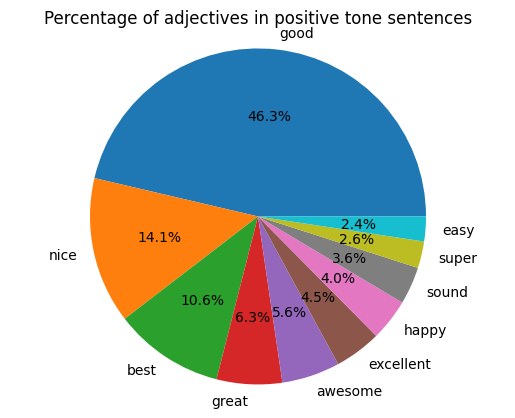

In [ ]:
#Visualising most number of adjectives in positive tone sentences through pie chart.
plt.pie(df_count_adj_pos['count'],labels=df_count_adj_pos['input'],autopct='%1.1f%%')
plt.title('Percentage of adjectives in positive tone sentences')
plt.axis('equal')
plt.show()

In [ ]:
#Retrieving Counter for most number of adjectives in neutral tone sentences
neutral_sent=count_neutral.keys()
list_neutral_sent=list(neutral_sent)
df_neutral_sent=pd.DataFrame(list_neutral_sent,columns=['input_neutral'])
from nltk import pos_tag
list_adj_neutral=[]
for i in df_neutral_sent['input_neutral']:
  words_neutral=nltk.word_tokenize(i)
  tags=pos_tag(words_neutral)
  for i,j in tags:
    if j in ['JJ', 'JJR', 'JJS']:
      list_adj_neutral.append(i)
count_adj_neutral=Counter(list_adj_neutral)
df_count_adj_neutral=pd.DataFrame(count_adj_neutral.most_common(10),columns=['input','count'])

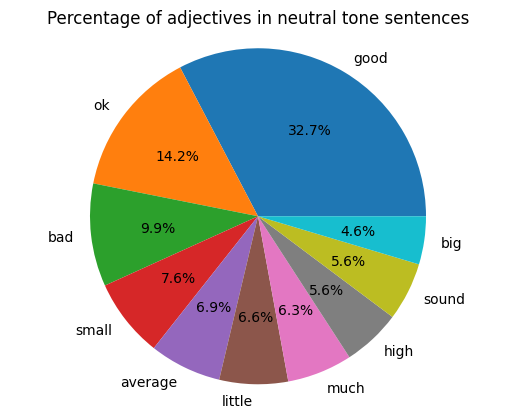

In [ ]:
#Visualising most number of adjectives in neutral tone sentences through pie chart.
plt.pie(df_count_adj_neutral['count'],labels=df_count_adj_neutral['input'],autopct='%1.1f%%')
plt.title('Percentage of adjectives in neutral tone sentences')
plt.axis('equal')
plt.show()

In [ ]:
#using Label Encoder The processed sentence labels are encoded to its numeral values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_lemmatised['output'])
Y=pd.DataFrame(y,columns=['output'])

In [ ]:
#Splitting Dataset into Training and Testing with 80% training data and 20% Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_lemmatised['input'], Y['output'], test_size=0.2, random_state=42)

In [ ]:
#Forming Frequency Vectors and TFIDF Vectors for representing frequency and importance of words in the corpus
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
Frequency_Vector = CountVectorizer()
Frequency_matrix = Frequency_Vector.fit_transform(x_train)
TFIDF_Vector = TfidfTransformer()
TFIDF_Matrix = TFIDF_Vector.fit_transform(Frequency_matrix)

In [ ]:
print(Frequency_matrix.shape)
print(TFIDF_Matrix.shape)

(19999, 12593)
(19999, 12593)


In [ ]:
#Defining NaiveBayes Classifier for Multinomial Classification for 3 classes and training with TFIDF matrix and Training Label set
from sklearn.naive_bayes import MultinomialNB
Model_NB= MultinomialNB().fit(TFIDF_Matrix, y_train)

In [ ]:
#Forming Frequency Vectors and TFIDF Vectors for representing frequency and importance of words in the corpus for testing set
Frequency_matrix_test= Frequency_Vector.transform(x_test)
TFIDF_Matrix_test = TFIDF_Vector.transform(Frequency_matrix_test)

In [ ]:
#Predicting class for each sentence in testing set
NB_Predictions = Model_NB.predict(TFIDF_Matrix_test)

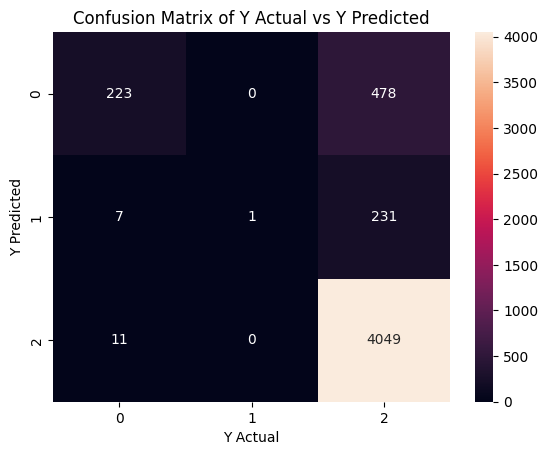

In [ ]:
#Forming Confusion Matrix of True Positives, True Negetives, False Positives and False Negatives and visualising through HeatMap.
from sklearn.metrics import confusion_matrix
confusionMatrix=confusion_matrix(y_test,NB_Predictions)
sb.heatmap(confusionMatrix,annot=True, fmt='d')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.title('Confusion Matrix of Y Actual vs Y Predicted')
plt.show()

In [ ]:
#Retrieving Accuracy, Precision, Recall and F1 Scores
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

NB_Accuracy=accuracy_score(y_test,NB_Predictions)
NB_Precision=precision_score(y_test,NB_Predictions,average='macro')
NB_Recall=recall_score(y_test,NB_Predictions,average='macro')
NB_f1_score=f1_score(y_test,NB_Predictions,average='macro')

print('Accuracy = '+str(NB_Accuracy*100))
print('Precision= '+str(NB_Precision*100))
print('Recall= '+str(NB_Recall*100))
print('F1_Score= '+str(NB_f1_score*100))

Accuracy = 85.46000000000001
Precision= 92.54330044412352
Recall= 43.986390552047624
F1_Score= 46.67142957121259


In [ ]:
#Forming Classification report of Models Performance
from sklearn.metrics import classification_report
NB_Classification_Report = classification_report(y_test, NB_Predictions)
print(NB_Classification_Report)

              precision    recall  f1-score   support

           0       0.93      0.32      0.47       701
           1       1.00      0.00      0.01       239
           2       0.85      1.00      0.92      4060

    accuracy                           0.85      5000
   macro avg       0.93      0.44      0.47      5000
weighted avg       0.87      0.85      0.81      5000



In [ ]:
#Initialising BertTokeniser for Tokenising sentences into words and and encoding the sentences of both training and testing datasets
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
x_train_encoded= tokenizer(x_train.tolist(), padding=True, truncation=True, return_tensors='pt',max_length=64)
x_test_encoded= tokenizer(x_test.tolist(), padding=True, truncation=True, return_tensors='pt',max_length=64)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
import torch

In [ ]:
#Using Pytorch's Bert Classifier Function, Training the model with setting parameters such as number of classes,
#Batch Size, Learning Rate and Epochs based on size of the dataset and faster computing
Bert_Model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
Bert_Tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#It transforms numerical labels to tensor flow suitable formatted data.
Y_train_tensor = torch.tensor(y_train.tolist())
#Input id is the word identifier and Attention Mask is the Word embedding for unique words in the corpus.
Train_Data_Transform = TensorDataset(x_train_encoded['input_ids'], x_train_encoded['attention_mask'], Y_train_tensor)
#Making Training Dataset into subsets.
Train_Data_Sampler = RandomSampler(Train_Data_Transform)
Train_Data_Loader = DataLoader(Train_Data_Transform, sampler=Train_Data_Sampler, batch_size=8)
#Using optimizer 'adam' for fine tuning the bert model to increase performance.
Bert_Model_optimizer = torch.optim.AdamW(Bert_Model.parameters(), lr=2e-5)

#Training The bert Model with 2 epochs and batch size of 8, calculating loss for each epoch
Bert_Model.train()
for i in range(2):
    epoch_loss = 0
    for batch in Train_Data_Loader:
        input_id_train=batch[0]
        attention_mask_train=batch[1]
        label_train = batch[2]
        Bert_Model_outputs = Bert_Model(input_id_train, attention_mask=attention_mask_train, labels=label_train)
        batch_loss = Bert_Model_outputs.loss
        epoch_loss = epoch_loss+batch_loss.item()
        batch_loss.backward()
        Bert_Model_optimizer.step()
        Bert_Model.zero_grad()

    Average_Epoch_Loss = epoch_loss / len(Train_Data_Loader)
    print('Epoch '+str(i)+' Loss = '+str(Average_Epoch_Loss))


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 0 Loss = 0.3011327987669036
Epoch 1 Loss = 0.2291234444603324


In [ ]:
#Predicting Classes with the Testing dataset.
input_ids_test= x_test_encoded['input_ids']
attention_mask_test = x_test_encoded['attention_mask']
with torch.no_grad():
    Bert_Model_outputs_test= Bert_Model(input_ids_test, attention_mask=attention_mask_test)
Bert_Model_outputs_classes =  Bert_Model_outputs_test.logits
Bert_Model_Predictions = torch.argmax(Bert_Model_outputs_classes, dim=-1).cpu().numpy()

In [ ]:
#Converting Test labels to an array
y_test_array = y_test.to_numpy()

In [ ]:
#Calculating Models Performance with Accuracy, Precision, recall and f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
Bert_Accuracy = accuracy_score(y_test_array,Bert_Model_Predictions )
Bert_Precision = precision_score(y_test_array, Bert_Model_Predictions , average='macro')
Bert_Recall = recall_score(y_test_array,Bert_Model_Predictions , average='macro')
Bert_F1_Score=f1_score(y_test_array,Bert_Model_Predictions ,average='macro')

In [ ]:
print('Accuracy = '+str(Bert_Accuracy*100))
print('Precision= '+str(Bert_Precision*100))
print('Recall= '+str(Bert_Recall*100))
print('F1_Score= '+str(Bert_F1_Score*100))

Accuracy = 91.66
Precision= 82.36866562469936
Recall= 71.4050121761224
F1_Score= 73.83652337221199


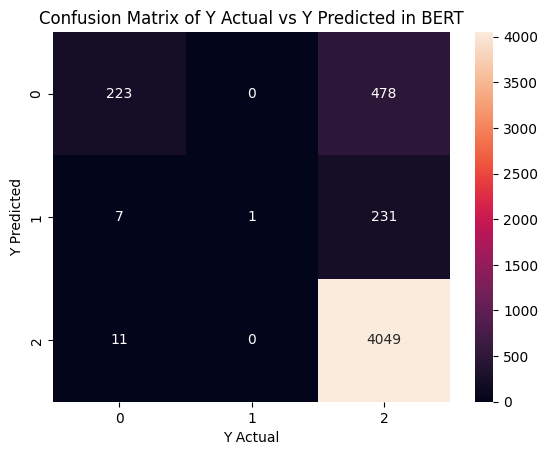

In [ ]:
#Forming Confusion Matrix of True Positives, True Negetives, False Positives and False Negatives and visualising through HeatMap.
from sklearn.metrics import confusion_matrix
confusionMatrix_Bert=confusion_matrix(y_test_array,predictions)
sb.heatmap(confusionMatrix,annot=True, fmt='d')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.title('Confusion Matrix of Y Actual vs Y Predicted in BERT')
plt.show()

In [ ]:
#Forming Classification report of Models Performance
Bert_Classification_Report = classification_report(y_test_array, predictions)
print(Bert_Classification_Report)

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       701
           1       0.79      0.34      0.48       239
           2       0.96      0.96      0.96      4060

    accuracy                           0.92      5000
   macro avg       0.82      0.72      0.74      5000
weighted avg       0.92      0.92      0.91      5000



In [ ]:
#References:
#1.https://luv-bansal.medium.com/fine-tuning-bert-for-text-classification-in-pytorch-503d97342db2
#2.https://www.geeksforgeeks.org/sentiment-classification-using-bert/
#3.https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/

SyntaxError: invalid syntax (<ipython-input-10-044e28dc78ce>, line 1)